In [1]:
import pandas as pd
link='https://raw.githubusercontent.com/maomaohenmao/data/master/small_donations_data.csv'
donor = pd.read_csv(link)

In [2]:
donor.head()

,id,report_number,origin,filer_id,type,filer_name,first_name,middle_initial,last_name,office,...,contributor_address,contributor_city,contributor_state,contributor_zip,contributor_occupation,contributor_employer_name,contributor_employer_city,contributor_employer_state,url,contributor_location
0,4924154.rcpt,100670216,C3,MACED 592,Candidate,MACEWEN DREW C,DREW,C,MACEWEN,STATE REPRESENTATIVE,...,410 E PICKERING RD.,SHELTON,WA,98584,NaN,NaN,NaN,NaN,View report (http://web.pdc.wa.gov/rptimg/defa...,"(47.27572, -122.96448)"
1,5265339.rcpt,100722381,C3,APPLS 370,Candidate,APPLETON SHERRY V,SHERRY,V,APPLETON,STATE REPRESENTATIVE,...,"1155 N STATE ST., SUITE 316",BELLINGHAM,WA,98225,NaN,NaN,NaN,NaN,View report (http://web.pdc.wa.gov/rptimg/defa...,"(48.74694, -122.47985)"
2,4476891.rcpt,100596549,C3,JUSTFA 507,Political Committee,WA ST ASSN FOR JUSTICE JUSTICE FOR ALL,NaN,NaN,WA ST ASSN FOR JUSTICE JUSTICE FOR ALL,NaN,...,1030 N CENTER PKWY #208,KENNEWICK,WA,99336,ATTORNEY,"GIERTH-EDDY LAW OFFICES, PLLC",KENNEWICK,WA,View report (http://web.pdc.wa.gov/rptimg/defa...,"(46.2216, -119.23016)"
3,4567569.rcpt,100612601,C3,WASHCV 145,Political Committee,WA CONSERVATION VOTERS ACTION FUND,NaN,NaN,WA CONSERVATION VOTERS ACTION FUND,NaN,...,2607 WESTERN AVE #601,SEATTLE,WA,98121,NaN,NaN,NaN,NaN,View report (http://web.pdc.wa.gov/rptimg/defa...,"(47.61462, -122.35099)"
4,2997493.rcpt,100380393,C4,BUNKR2 391,Candidate,BUNK RAYMOND R III,RAYMOND,R,BUNK,STATE SENATOR,...,20825 STATE ROUTE 410 EAST #416,BONNEY LAKE,WA,98391,LAW ENFORCEMENT OFFICER,FEDERAL WAY POLICE DEPARTMENT,FEDERAL WAY,WA,View report (http://web.pdc.wa.gov/rptimg/defa...,"(47.17704, -122.1865)"


In [3]:
donor.dtypes

id                             object
report_number                   int64
origin                         object
filer_id                       object
type                           object
filer_name                     object
first_name                     object
middle_initial                 object
last_name                      object
office                         object
legislative_district          float64
position                       object
party                          object
ballot_number                 float64
for_or_against                 object
jurisdiction                   object
jurisdiction_county            object
jurisdiction_type              object
election_year                   int64
amount                        float64
cash_or_in_kind                object
receipt_date                   object
description                    object
memo                           object
primary_general                object
code                           object
contributor_

In [4]:
donor['contributor_city']= donor['contributor_city'].astype('category')

In [16]:
donor['party']= donor['party'].astype('category')

In [5]:
donor['primary_general']=donor['primary_general'].astype('category')

In [6]:
donor['type']= donor['type'].astype('category')

In [17]:
donorsmall= donor[['contributor_state','contributor_zip','amount','contributor_city','party','type','primary_general']]

In [18]:
donorsmall.head()

,contributor_state,contributor_zip,amount,contributor_city,party,type,primary_general
0,WA,98584,20.00,SHELTON,REPUBLICAN,Candidate,Primary
1,WA,98225,1000.00,BELLINGHAM,DEMOCRAT,Candidate,General
2,WA,99336,30.00,KENNEWICK,NaN,Political Committee,Full election cycle
3,WA,98121,50.00,SEATTLE,NaN,Political Committee,Full election cycle
4,WA,98391,164.17,BONNEY LAKE,DEMOCRAT,Candidate,Primary


In [19]:
donorsmall['amount'].describe()

count      9491.000000
mean        255.749095
std        2957.761253
min           0.000000
25%          10.000000
50%          35.000000
75%         100.000000
max      122649.590000
Name: amount, dtype: float64

In [20]:
donorsmall['amount'].skew()

28.830049197495612

In [21]:
donorsmall['amount'].kurt()

937.07852125065983

In [22]:
donorsmall.dtypes

contributor_state      object
contributor_zip         int64
amount                float64
contributor_city     category
party                category
type                 category
primary_general      category
dtype: object

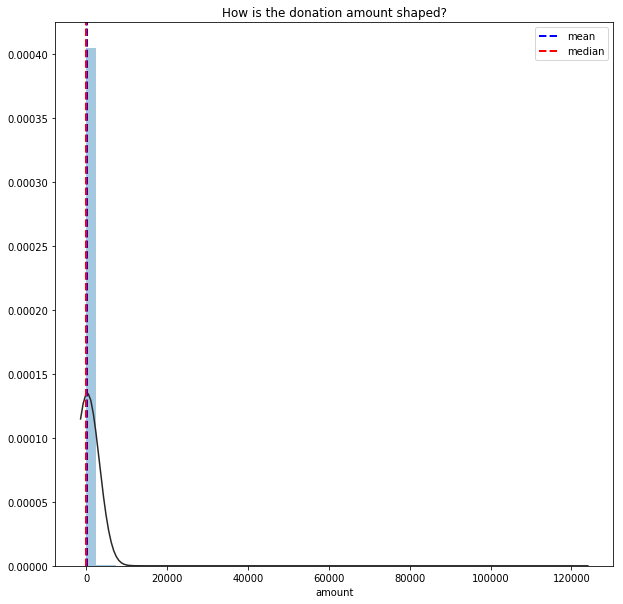

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

mnVar=donorsmall['amount'].mean()
mdVar=donorsmall['amount'].median()
plt.figure(figsize=(10,10))
sns.distplot(donorsmall['amount'].dropna(),kde=False,fit=norm)
plt.title('How is the donation amount shaped?')
plt.axvline(mnVar, color='b', linestyle='dashed', linewidth=2,label='mean')
plt.axvline(mdVar, color='r', linestyle='dashed', linewidth=2,label='median')
plt.legend()
plt.show()

In [25]:
donorsmall['contributor_city'].dtypes

CategoricalDtype(categories=['ABERDEEN', 'ACME', 'ADDY', 'AIRWAY HEIGHTS', 'ALBUQUERQUE',
                  'ALEXANDRIA', 'ALGONA', 'ALLYN', 'ALMIRA', 'AMBLER',
                  ...
                  'WOODINVILLE', 'WOODLAND', 'WOODSIDE', 'WOODWAY', 'YACOLT',
                  'YAKIMA', 'YARDLEY', 'YARROW POINT', 'YELM', 'ZILLAH'],
                 ordered=False)

In [26]:
donorsmall['contributor_city'].describe()

count        9491
unique        718
top       SEATTLE
freq         1790
Name: contributor_city, dtype: object

In [27]:
donorsmall['primary_general'].value_counts()

Full election cycle    6248
Primary                1985
General                1258
Name: primary_general, dtype: int64

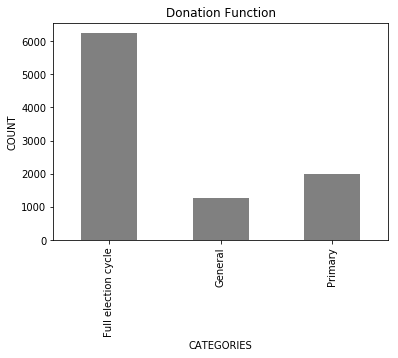

In [28]:
%matplotlib inline
newerPalette=['grey']*3 + ['orange']*3 + ['turquoise']*3 + ['lightblue']*3
donorsmall['primary_general'].value_counts(sort=False).plot.bar(color=newerPalette, title="Donation Function")
plt.ylabel('COUNT')
plt.xlabel('CATEGORIES')
plt.show()

In [29]:
donorsmall['party'].describe()

count         3680
unique           6
top       DEMOCRAT
freq          1366
Name: party, dtype: object

In [30]:
donorsmall['party'].value_counts()

DEMOCRAT        1366
REPUBLICAN      1148
NON PARTISAN    1090
OTHER             38
NONE              35
INDEPENDENT        3
Name: party, dtype: int64

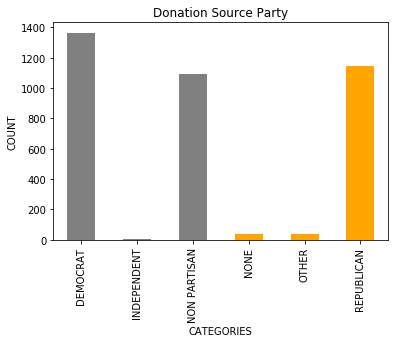

In [31]:
%matplotlib inline
newerPalette=['grey']*3 + ['orange']*3 + ['turquoise']*3 + ['lightblue']*3
donorsmall['party'].value_counts(sort=False).plot.bar(color=newerPalette, title="Donation Source Party")
plt.ylabel('COUNT')
plt.xlabel('CATEGORIES')
plt.show()

In [32]:
byeCategories=['NONE']
donorDRI=donorsmall[~donorsmall.party.isin(byeCategories)].copy()

In [33]:
donorDRI.head()

,contributor_state,contributor_zip,amount,contributor_city,party,type,primary_general
0,WA,98584,20.00,SHELTON,REPUBLICAN,Candidate,Primary
1,WA,98225,1000.00,BELLINGHAM,DEMOCRAT,Candidate,General
2,WA,99336,30.00,KENNEWICK,NaN,Political Committee,Full election cycle
3,WA,98121,50.00,SEATTLE,NaN,Political Committee,Full election cycle
4,WA,98391,164.17,BONNEY LAKE,DEMOCRAT,Candidate,Primary


In [35]:
pd.pivot_table(donorDRI, values='amount',index='primary_general',columns='party', aggfunc='mean')

party,DEMOCRAT,INDEPENDENT,NON PARTISAN,OTHER,REPUBLICAN
primary_general,,,,,
Full election cycle,111.891500,108.5,170.656211,54.266667,149.010714
General,269.072911,NaN,207.928530,183.000000,362.629145
Primary,210.884613,250.0,192.544473,1785.769231,224.178698


In [36]:
seattle = donorDRI[(donorDRI.contributor_city=='SEATTLE')]

C:\Users\win\Documents\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


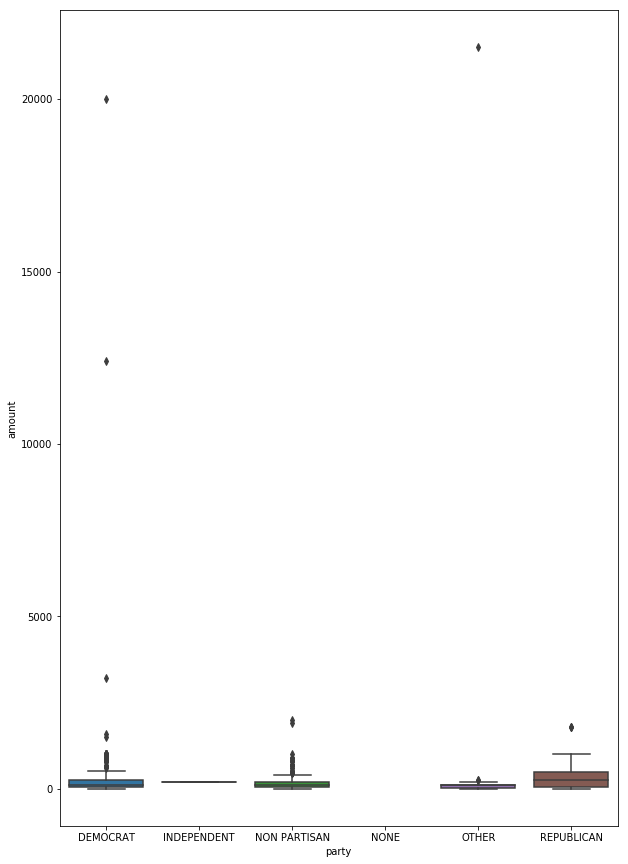

In [37]:
plt.figure(figsize=(10,15))
sns.boxplot(x="party", y="amount", data=seattle)

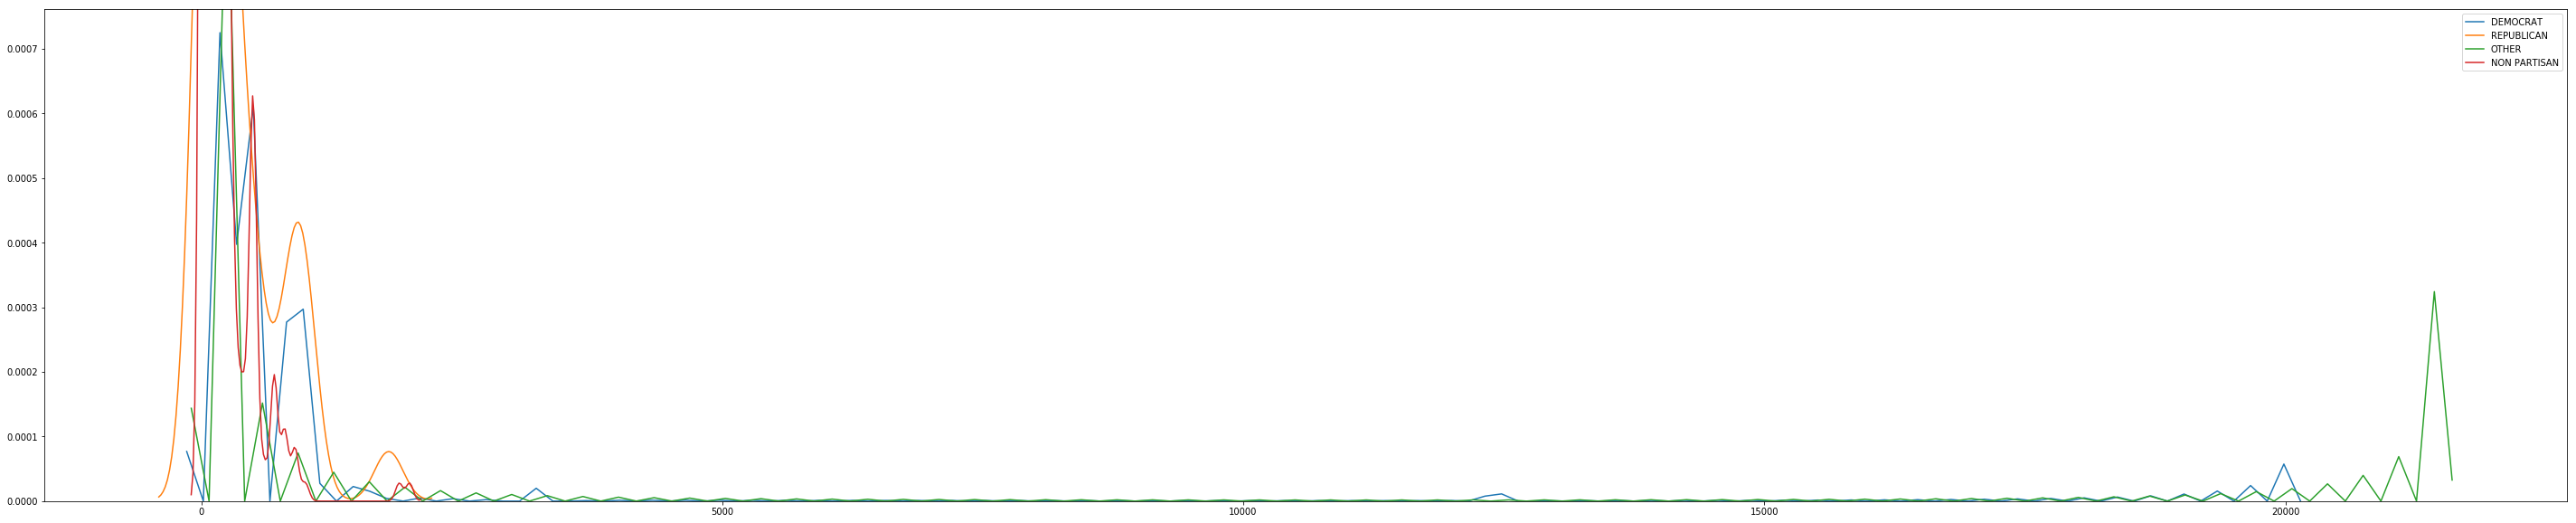

In [38]:
plt.figure(figsize=(50,10))
sns.kdeplot(seattle[seattle.party=='DEMOCRAT'].amount, label="DEMOCRAT")
sns.kdeplot(seattle[seattle.party=='REPUBLICAN'].amount, label="REPUBLICAN")
sns.kdeplot(seattle[seattle.party=='OTHER'].amount, label="OTHER")
sns.kdeplot(seattle[seattle.party=='NON PARTISAN'].amount, label="NON PARTISAN")
plt.legend();

In [42]:
donorDRI.dropna(inplace=True)

In [43]:
from statsmodels.robust.robust_linear_model import RLM

formula='amount ~ C(party, Treatment("INDEPENDENT"))+ C(type, Treatment("Political Committee"))+ C(primary_general, Treatment("Primary"))'
LinRegR_catX = RLM.from_formula(formula, donorDRI).fit()
print(LinRegR_catX.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                 amount   No. Observations:                 3645
Model:                            RLM   Df Residuals:                     3638
Method:                          IRLS   Df Model:                            6
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 08 Feb 2018                                         
Time:                        09:38:44                                         
No. Iterations:                    50                                         
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

In [44]:
pd.concat({'Coefficients':LinRegR_catX.params,
           'Significant?':LinRegR_catX.pvalues<0.05},axis=1)

,Coefficients,Significant?
Intercept,8.580305e+01,False
"C(party, Treatment(""INDEPENDENT""))[T.DEMOCRAT]",-5.278514e+01,False
"C(party, Treatment(""INDEPENDENT""))[T.NON PARTISAN]",-4.437050e+01,False
"C(party, Treatment(""INDEPENDENT""))[T.NONE]",-3.022552e-13,False
"C(party, Treatment(""INDEPENDENT""))[T.OTHER]",-6.774446e+01,False
"C(party, Treatment(""INDEPENDENT""))[T.REPUBLICAN]",-4.797225e+01,False
"C(type, Treatment(""Political Committee""))[T.Candidate]",8.580305e+01,False
"C(primary_general, Treatment(""Primary""))[T.Full election cycle]",-2.390914e+01,True
"C(primary_general, Treatment(""Primary""))[T.General]",1.841212e+01,True
